# Prize-linked savings ticket simulation overview

This notebook simulates a prize-linked savings scenario, analyzing the distribution of matches and the odds of winning a prize.

The analysis demonstrates the use of Python's pandas for tabular data, summary statistics, and matplotlib for visualization.

In [25]:
# use Python 3.13.5 as kernal

In [26]:
def generate_num(u, sd):
    # Generate a random integer, sampled from a normal distribution
    # with mean `u` and standard deviation `sd`
    import random
    return max(0, int(random.gauss(u, sd)))

In [27]:
def pick_ticket():
    import random

    # Define the range of ticket numbers
    min_ticket = 0
    max_ticket = 99

    # Generate a ticket with 7 unique numbers
    ticket = random.sample(range(min_ticket, max_ticket + 1), 7)

    return ticket

In [28]:
def count_matches(ticket, winning_ticket):
    # Count how many numbers in the ticket match the winning ticket
    return len(set(ticket) & set(winning_ticket))

In [29]:
# Prize-linked savings simulation
winning_ticket = pick_ticket()
num_users = 10000
ticket_mean = 25
ticket_sd = 1

user_ticket_dict = {
    str(i): [pick_ticket() for _ in range(min(generate_num(ticket_mean, ticket_sd), 50))] for i in range(num_users)
}

total_tickets = sum(len(tickets) for tickets in user_ticket_dict.values())

# Count matches for each ticket
match_counts = {}  # key: number of matches, value: count of tickets
for tickets in user_ticket_dict.values():
    for ticket in tickets:
        matches = count_matches(ticket, winning_ticket)
        match_counts[matches] = match_counts.get(matches, 0) + 1

print(f'Total users: {num_users}')
print(f'Total tickets: {total_tickets}')
print('Match summary:')
print('Matches | Ticket Count')
for matches in range(8):
    print(f'{matches:7} | {match_counts.get(matches, 0):12}')


Total users: 10000
Total tickets: 244967
Match summary:
Matches | Ticket Count
      0 |       145303
      1 |        81624
      2 |        16481
      3 |         1483
      4 |           75
      5 |            1
      6 |            0
      7 |            0


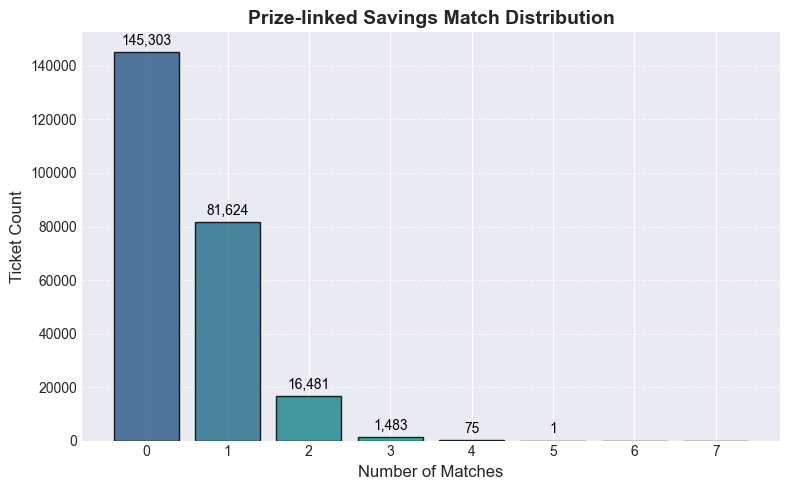

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Use a modern style
plt.style.use('seaborn-v0_8-darkgrid')

# Plotting the match summary
matches = list(range(8))
ticket_counts = [match_counts.get(m, 0) for m in matches]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(matches, ticket_counts, color=plt.cm.viridis(np.linspace(0.3, 0.9, len(matches))), edgecolor='black', alpha=0.85)

ax.set_xlabel('Number of Matches', fontsize=12)
ax.set_ylabel('Ticket Count', fontsize=12)
ax.set_title('Prize-linked Savings Match Distribution', fontsize=14, fontweight='bold')
ax.set_xticks(matches)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{height:,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [31]:
# Repeat simulation until a ticket with X matches is found
num_matches = 5
simulations = 0
found = False
while not found:
    simulations += 1
    winning_ticket = pick_ticket()
    user_ticket_dict = {
        str(i): [pick_ticket() for _ in range(min(generate_num(ticket_mean, ticket_sd), 50))] for i in range(num_users)
    }
    for tickets in user_ticket_dict.values():
        for ticket in tickets:
            matches = count_matches(ticket, winning_ticket)
            if matches == num_matches:
                found = True
                print(f"Simulation {simulations}: Found a ticket with 6 matches!")
                print(f"Winning ticket: {winning_ticket}")
                print(f"Matching ticket: {ticket}")
                break
        if found:
            break
if not found:
    print(f"No ticket with 6 matches found after {simulations} simulations.")

Simulation 4: Found a ticket with 6 matches!
Winning ticket: [2, 65, 68, 90, 67, 6, 92]
Matching ticket: [66, 65, 2, 6, 67, 90, 86]


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the match_counts dictionary
data = {
    'Number of Matches': list(match_counts.keys()),
    'Ticket Count': list(match_counts.values())
}
match_df = pd.DataFrame(data).sort_values('Number of Matches').reset_index(drop=True)

# Display the table
print('Ticket Match Summary Table:')
display(match_df)

# Show summary statistics for the ticket counts
print('\nSummary statistics for ticket counts:')
print(match_df['Ticket Count'].describe())

Ticket Match Summary Table:


,Number of Matches,Ticket Count
0,0,145303
1,1,81624
2,2,16481
3,3,1483
4,4,75
5,5,1



Summary statistics for ticket counts:
count         6.000000
mean      40827.833333
std       60079.606545
min           1.000000
25%         427.000000
50%        8982.000000
75%       65338.250000
max      145303.000000
Name: Ticket Count, dtype: float64
